# 1. Abrindo Bibliotecas

### Bibliotecas genérias

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### As seguintes bibliotecas serão alvo do nosso estudo:

In [19]:
from pandas_datareader import data
import quandl
import cufflinks as cf
import yahoofinancials

A intenção desse estudo é trazer dados úteis que podem esclarecer um pouco mais o que aconteceu com GME na situação do short squeeze

Conceito de Data Hedging
https://www.investopedia.com/terms/d/deltahedging.asp

O que é o Short Interest?

https://www.investopedia.com/articles/01/082201.asp

# 2. Cufflinks

In [2]:
cf.set_config_file(theme='pearl',sharing='public',offline=True)

In [5]:
gme = data.DataReader('GME', data_source='yahoo', start='2020-12-01')

In [6]:
gme.iplot(kind="candle",
                          keys=["Open", "High", "Low", "Close"],
                          rangeslider=True
                          )

In [7]:
qf=cf.QuantFig(gme,title='First Quant Figure',legend='top',name='GS')
qf.add_bollinger_bands()
qf.iplot()

In [8]:
qf=cf.QuantFig(gme,title='First Quant Figure',legend='top',name='GS')
qf.add_bollinger_bands()
qf.add_volume()
qf.iplot()

In [158]:
qf=cf.QuantFig(gme,title='GME Quant Figure',legend='top',name='GS')

qf.add_adx()
qf.add_cci()
qf.add_dmi()
qf.add_ema()

qf.iplot()

# 3. Quandl

A Quandl será usada aqui para capturar dados do Volume de Ações Vendidas (Short Sale Volume) obtidos da FINRA.

O que é isso?

Seguindo uma norma da SEC, a FINRA disponibiliza publicamente dados diários do volume de papéis vendidtos (short) de negociações de ações não listadas em exchanges (over the counter securities), reportadas ao OTC Reporting Facility.

Esses dados fornecem o volume agregado por ação de todas as negociações vendidas executadas e reportadas à OFR durante o horário de pregão.

Para saber mais sobre os dados:
https://www.finra.org/filing-reporting/orf/orf-regulation-sho


Para saber mais sobre a OFR:
https://www.finra.org/filing-reporting/over-the-counter-reporting-facility-orf#:~:text=The%20OTC%20Reporting%20Facility%20(ORF,dissemination%20of%20last%20sale%20reports.

Documentação da FINRA na Quandl

https://www.quandl.com/data/FINRA/FNYX_GME-FINRA-NYSE-TRF-Short-Interest-GME

Agora que você já obteve seu token de acesso a Quandl, vamos salvá-lo num arquivo .txt de nome "senha"

A seguir, vamos abrir esse arquivo, e chamar de "token" o seu conteúdo

Chave da Quandl vem num formato parecido com esse:

In [5]:
f = open("senha.txt", "r")

token = f.read()

In [6]:
token

'77TfLxTY9XzxycV_uzSe'

In [8]:
quandl.ApiConfig.api_key = token

In [5]:
quandl.ApiConfig.api_key = "77TfLxTY9XzxycV_uzSe"

Note que tanto esse resultado quanto o do S&P 500 são consolidados por mês

In [21]:
finra = quandl.get("FINRA/FNYX_GME", trim_start = "2020-08-01")

In [22]:
finra.head()

,ShortVolume,ShortExemptVolume,TotalVolume
Date,,,
2020-08-03,28678.0,0.0,167741.0
2020-08-04,434953.0,0.0,1411726.0
2020-08-05,205375.0,0.0,459608.0
2020-08-06,69919.0,0.0,199033.0
2020-08-07,143366.0,0.0,339322.0


# Explicar
* O que é a FINRA
* O que são Market Makers
* O que é hedge
* O que são calls - opções de compra
* Falar que nos EUA a margem precisa ser respeitada, se não o vendido (short seller) precisa comprar o papel
* O que é o short interest?

In [ ]:
# Procurar dados de compra do papel e hold por parte dos acionistas

# Uma opção é mostrar isso através da diminuição do float geral do papel

# Quanto do free float passou a ser 'segurado' pelos acionistas?

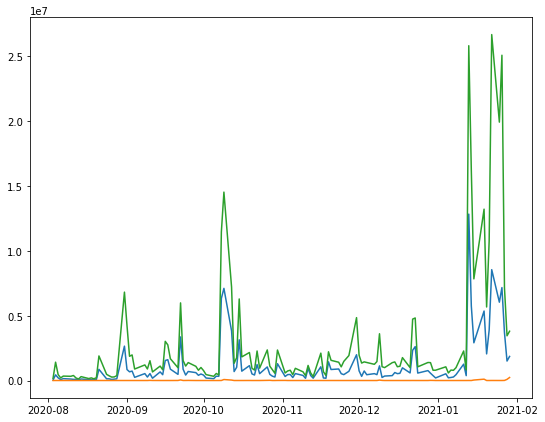

In [20]:
finra = quandl.get("FINRA/FNYX_GME", trim_start = "2020-08-01")
plt.figure(figsize=(9,7))
plt.plot(finra)

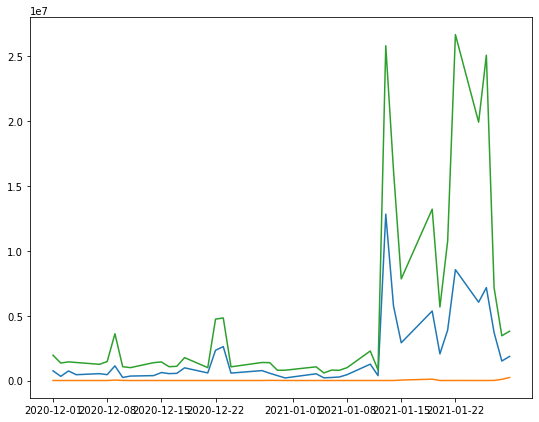

In [21]:
finra = quandl.get("FINRA/FNYX_GME", trim_start = "2020-12-01")
plt.figure(figsize=(9,7))
plt.plot(finra)

Exemplo de como verificar cotação vs. volume

https://www.reddit.com/r/wallstreetbets/comments/l81luf/hey_sec_heres_your_market_manipulation_rh_working/

OBS.: Nesse ponto tentar pegar os dados de short interest de vários outros papéis e compará-los no mesmo gráfico

# 4. yahoofinancials

A biblioteca *yahoofinancials* é uma das melhores formas de se obter dados fundamentalistas direto do Yahoo Finance, em poucas linhas de código

A grande desvantagem é que os dados são retornados em elementos JSON, que por natureza são difcíceis de se realizar o parse, e consequentemente torna o processamento e a análise posterior um pouco mais difícil

Referências para trabalhar com JSONs

https://towardsdatascience.com/how-to-parse-json-data-with-python-pandas-f84fbd0b1025
    
https://stackoverflow.com/questions/16729574/how-to-get-a-value-from-a-cell-of-a-dataframe
    
https://stackoverflow.com/questions/42354001/python-json-object-must-be-str-bytes-or-bytearray-not-dict
    
https://stackoverflow.com/questions/21104592/json-to-pandas-dataframe

In [22]:
! pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15195 sha256=e0c2ac737f8dd5c336dc101036356d2cc2b3e1a1ab832d81369b044eec0154c4
  Stored in directory: c:\users\victo\appdata\local\pip\cache\wheels\6a\90\0c\08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809
Successfully built yahoofinancials


In [23]:
from yahoofinancials import YahooFinancials

ticker = 'GME'
yahoo_financials = YahooFinancials(ticker)

### Vamos verificar os dados anuais pra ver se bate com o Yahoo Finance

In [ ]:
balance_sheet_data_qt = yahoo_financials.get_financial_stmts('quarterly', 'balance')
income_statement_data_qt = yahoo_financials.get_financial_stmts('quarterly', 'income')
all_statement_data_qt =  yahoo_financials.get_financial_stmts('quarterly', ['income', 'cash', 'balance'])
GME_earnings_data = yahoo_financials.get_stock_earnings_data()
GME_net_income = yahoo_financials.get_net_income()

In [132]:
balance_sheet_data_qt = yahoo_financials.get_financial_stmts('annual', 'balance')
income_statement_data_qt = yahoo_financials.get_financial_stmts('annual', 'income')

# Outra opção de obter o dado de statment é usando todos os statements: income, cash e balance
all_statement_data_qt =  yahoo_financials.get_financial_stmts('annual', ['income', 'cash', 'balance'])

GME_earnings_data = yahoo_financials.get_stock_earnings_data()
GME_net_income = yahoo_financials.get_net_income()

Vamos fazer um teste: que tipo são esses dados nos outputs?

In [70]:
type(all_statement_data_qt)

dict

In [133]:
all_statement_data_qt

{'incomeStatementHistory': {'GME': [{'2020-02-01': {'researchDevelopment': None,
     'effectOfAccountingCharges': None,
     'incomeBeforeTax': -426800000,
     'minorityInterest': None,
     'netIncome': -470900000,
     'sellingGeneralAdministrative': 1893600000,
     'grossProfit': 1908700000,
     'ebit': 15100000,
     'operatingIncome': 15100000,
     'otherOperatingExpenses': None,
     'interestExpense': -38500000,
     'extraordinaryItems': None,
     'nonRecurring': None,
     'otherItems': None,
     'incomeTaxExpense': 37600000,
     'totalRevenue': 6466000000,
     'totalOperatingExpenses': 6450900000,
     'costOfRevenue': 4557300000,
     'totalOtherIncomeExpenseNet': -441900000,
     'discontinuedOperations': -6500000,
     'netIncomeFromContinuingOps': -464400000,
     'netIncomeApplicableToCommonShares': -470900000}},
   {'2019-02-02': {'researchDevelopment': None,
     'effectOfAccountingCharges': None,
     'incomeBeforeTax': -753100000,
     'minorityInterest': No

Verifique que esses dados são do tipo "JSON", por isso vem no formato de dicionário. Por causa disso, teremos que trabalhar com métodos específicos para tratar JSON

As principais funções para se trabalhar com JSON são:

json.loads take a string as input and returns a dictionary as output.

json.dumps take a dictionary as input and returns a string as output.

Além disso, na package pandas, a função pd.json_normalize pega um JSON de input e transforma num pandas Data Frame de output

In [139]:
import json
#data = json.dumps(data)
#data = json.loads(data)

incomeStatementHistory = pd.json_normalize(all_statement_data_qt['incomeStatementHistory'])

In [140]:
incomeStatementHistory

,GME
0,"[{'2020-02-01': {'researchDevelopment': None, ..."


In [143]:
dictionary = incomeStatementHistory.iloc[0]

string = list(dictionary[[0]])

stringa = string[0]

In [144]:
stringa

[{'2020-02-01': {'researchDevelopment': None,
   'effectOfAccountingCharges': None,
   'incomeBeforeTax': -426800000,
   'minorityInterest': None,
   'netIncome': -470900000,
   'sellingGeneralAdministrative': 1893600000,
   'grossProfit': 1908700000,
   'ebit': 15100000,
   'operatingIncome': 15100000,
   'otherOperatingExpenses': None,
   'interestExpense': -38500000,
   'extraordinaryItems': None,
   'nonRecurring': None,
   'otherItems': None,
   'incomeTaxExpense': 37600000,
   'totalRevenue': 6466000000,
   'totalOperatingExpenses': 6450900000,
   'costOfRevenue': 4557300000,
   'totalOtherIncomeExpenseNet': -441900000,
   'discontinuedOperations': -6500000,
   'netIncomeFromContinuingOps': -464400000,
   'netIncomeApplicableToCommonShares': -470900000}},
 {'2019-02-02': {'researchDevelopment': None,
   'effectOfAccountingCharges': None,
   'incomeBeforeTax': -753100000,
   'minorityInterest': None,
   'netIncome': -673000000,
   'sellingGeneralAdministrative': 1997200000,
   'gr

Observe que aqui obtivemos uma lista contendo vários dicionários, onde cada trimestre possui os resultados representados em um dicionário

Se quisermos trabalhar com um trimestre ou ano específico, precisaremos filtrar, e só em seguida criar um data frame

In [145]:
string_b = stringa[0]

In [146]:
string_b

{'2020-02-01': {'researchDevelopment': None,
  'effectOfAccountingCharges': None,
  'incomeBeforeTax': -426800000,
  'minorityInterest': None,
  'netIncome': -470900000,
  'sellingGeneralAdministrative': 1893600000,
  'grossProfit': 1908700000,
  'ebit': 15100000,
  'operatingIncome': 15100000,
  'otherOperatingExpenses': None,
  'interestExpense': -38500000,
  'extraordinaryItems': None,
  'nonRecurring': None,
  'otherItems': None,
  'incomeTaxExpense': 37600000,
  'totalRevenue': 6466000000,
  'totalOperatingExpenses': 6450900000,
  'costOfRevenue': 4557300000,
  'totalOtherIncomeExpenseNet': -441900000,
  'discontinuedOperations': -6500000,
  'netIncomeFromContinuingOps': -464400000,
  'netIncomeApplicableToCommonShares': -470900000}}

Agora enfim podemos transformar isso num data frame e em seguida seguir com a análise

In [147]:
string_df = pd.json_normalize(string_b['2020-02-01'])

In [148]:
string_df

,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,operatingIncome,otherOperatingExpenses,...,nonRecurring,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares
0,None,None,-426800000,None,-470900000,1893600000,1908700000,15100000,15100000,None,...,None,None,37600000,6466000000,6450900000,4557300000,-441900000,-6500000,-464400000,-470900000


Uma outra forma mais fácil de obter todas as estatísticas principais de uma só vez:

In [41]:
yahoo_financials = YahooFinancials('GME')
print(yahoo_financials.get_key_statistics_data())

{'GME': {'annualHoldingsTurnover': None, 'enterpriseToRevenue': 4.529, 'beta3Year': None, 'profitMargins': -0.053239997, 'enterpriseToEbitda': -180.657, '52WeekChange': 81.27848, 'morningStarRiskRating': None, 'forwardEps': -0.17, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 69747000, 'fundInceptionDate': '-', 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 5.095, 'sharesShort': 61782730, 'sharesPercentSharesOut': 0.8858, 'fundFamily': None, 'lastFiscalYearEnd': 1580515200, 'heldPercentInstitutions': 1.2204499, 'netIncomeToCommon': -270000000, 'trailingEps': -4.224, 'lastDividendValue': 0.38, 'SandP52WeekChange': 0.14322305, 'priceToBook': 48.086384, 'heldPercentInsiders': 0.27334, 'nextFiscalYearEnd': 1643673600, 'yield': None, 'mostRecentQuarter': 1604102400, 'shortRatio': 2.81, 'sharesShortPreviousMonthDate': '2020-12-15', 'floatShares': 46888789, 'beta': 1.433298, 'enterpriseValue': 23376961536, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitD

In [150]:
key_statistics = yahoo_financials.get_key_statistics_data()

Vamos transformar esse JSON em um data frame?

In [151]:
key_statistics_df = pd.json_normalize(key_statistics['GME'])

In [157]:
key_statistics_df.transpose()

,0
annualHoldingsTurnover,None
enterpriseToRevenue,4.529
beta3Year,None
profitMargins,-0.05324
enterpriseToEbitda,-180.657
52WeekChange,81.2785
morningStarRiskRating,None
forwardEps,-0.17
revenueQuarterlyGrowth,None
sharesOutstanding,69747000


# 5. Requests

Vamos usar agora um pouco de webscraping para obter as informações de short interest direto da internet?

In [10]:
import requests

import pandas as pd

In [13]:
url = "https://www.marketbeat.com/short-interest/"

In [14]:
response = requests.request("POST", url)

tables = pd.read_html(response.text)

In [15]:
tables

[                                              Company  \
 0                          CHTRCharter Communications   
 1                                       VIACViacomCBS   
 2                                              AONAON   
 3                                   ADIAnalog Devices   
 4                                         MRNAModerna   
 5                                 DDDuPont de Nemours   
 6                           PLTRPalantir Technologies   
 7                                            SNAPSnap   
 8               IFFInternational Flavors & Fragrances   
 9                                     BYNDBeyond Meat   
 10  (adsbygoogle = window.adsbygoogle || []).push(...   
 11                                       KRThe Kroger   
 12                                      CLXThe Clorox   
 13                                      SNOWSnowflake   
 14                              BBBYBed Bath & Beyond   
 15                                       SPWRSunPower   
 16           

In [16]:
pld_table = tables[0]

In [17]:
pld_table

,Company,Shares Sold Short (1/15/2021),Dollar VolumeSold Short,Shares Sold Short (12/31/2020),Change,% Change,% Float,Days to Cover,Avg. Daily Volume
0,CHTRCharter Communications,10620000,$6.95 billion,10630000,-10000,-0.1%,7.9%,9.3,1140000
1,VIACViacomCBS,121250000,$6.14 billion,117920000,3330000,2.8%,22.4%,9.3,13090000
2,AONAON,22570000,$4.66 billion,21470000,1100000,5.1%,10.0%,13.8,1630000
3,ADIAnalog Devices,30400000,$4.54 billion,28260000,2140000,7.6%,8.3%,11.4,2670000
4,MRNAModerna,24800000,$3.96 billion,23390000,1410000,6.0%,7.6%,1.1,23300000
5,DDDuPont de Nemours,46490000,$3.77 billion,23670000,22820000,96.4%,6.4%,5.6,8300000
6,PLTRPalantir Technologies,98950000,$3.53 billion,90740000,8210000,0.0%,9.7%,1.5,67870000
7,SNAPSnap,65420000,$3.48 billion,63160000,2260000,3.6%,7.0%,2.3,28910000
8,IFFInternational Flavors & Fragrances,29980000,$3.45 billion,19880000,10100000,50.8%,28.1%,10.4,2890000
9,BYNDBeyond Meat,15440000,$2.78 billion,13690000,1750000,12.8%,42.9%,3.2,4840000
